In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score

from collections import Counter

## Ensemble Results Exploration

In [5]:
data_path = 'ensemble_cache/ensemble_results.csv'

In [6]:
df = pd.read_csv(data_path)

In [7]:
df.head()

,id,taxonomic_level,joint_prediction,image_prediction,meta_prediction,true_label
0,4126,taxon_family_name,Elephantidae,Elephantidae,Elephantidae,Elephantidae
1,4126,taxon_genus_name,Loxodonta,Loxodonta,Loxodonta,Loxodonta
2,4126,taxon_species_name,Loxodonta africana,Loxodonta africana,Loxodonta africana,Loxodonta africana
3,16346,taxon_family_name,Elephantidae,Elephantidae,Elephantidae,Elephantidae
4,16346,taxon_genus_name,Loxodonta,Loxodonta,Loxodonta,Loxodonta


### Calculate the number of Miss-classifications
The ensemble method stops decreasing the taxonomic level prediction when a miss-classification occurs. 
Therefore the number of miss-classifications downs to the sub-species level can be calculated as follows.

In [8]:
error_count = len(df[df['joint_prediction'] != df['true_label']])

In [9]:
print(error_count)

505


Determine the number of unique observations within the predictions to determine the size of the dataset.

In [10]:
dataset_size = df['id'].nunique()

Calculate the error percentage

In [11]:
error_percent = error_count / dataset_size

In [12]:
print(error_percent)

0.16358924522189827


The ensemble method produces a total of 0.13 miss-classification rate. 
Hence the accuracy of the ensemble method is approximately 0.87

In [13]:
print(1 - error_percent)

0.8364107547781017


### Taxonomic Reports
Generate both the classification report and the accuracy report per taxonomic level. 

#### Family

In [14]:
df_family = df[df['taxonomic_level'] == 'taxon_family_name']

In [15]:
report_family = classification_report(df_family['joint_prediction'], df_family['true_label'])

In [16]:
print(report_family)

              precision    recall  f1-score   support

Elephantidae       0.99      0.99      0.99      1367
     Felidae       0.99      1.00      0.99      1723

    accuracy                           0.99      3090
   macro avg       0.99      0.99      0.99      3090
weighted avg       0.99      0.99      0.99      3090



In [17]:
accuracy_family = balanced_accuracy_score(df_family['joint_prediction'], df_family['true_label'])

In [18]:
print(accuracy_family)

0.992557765521001


#### Genus

In [19]:
df_genus = df[df['taxonomic_level'] == 'taxon_genus_name']

In [20]:
report_genus = classification_report(df_genus['joint_prediction'], df_genus['true_label'], zero_division=1)

In [21]:
print(report_genus)

              precision    recall  f1-score   support

    Acinonyx       0.90      0.90      0.90        82
     Caracal       0.78      0.33      0.47        63
    Catopuma       0.00      0.00      0.00         3
     Elephas       0.96      0.79      0.87       228
       Felis       0.61      0.54      0.57        46
 Herpailurus       0.96      0.36      0.52        64
   Leopardus       0.68      0.71      0.70       101
 Leptailurus       0.85      0.20      0.33        54
   Loxodonta       0.96      0.99      0.98      1125
        Lynx       0.73      0.98      0.84       576
    Neofelis       1.00      0.00      0.00         5
  Otocolobus       1.00      0.07      0.13        29
    Panthera       0.85      0.97      0.91       435
  Pardofelis       0.00      1.00      0.00         0
Prionailurus       0.62      0.22      0.32        23
        Puma       0.89      0.56      0.69       234

    accuracy                           0.86      3068
   macro avg       0.74   

In [22]:
accuracy_genus = balanced_accuracy_score(df_genus['joint_prediction'], df_genus['true_label'])

/home/travisdawson/anaconda3/envs/spatiotemp_class_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [23]:
print(accuracy_genus)

0.5090671117576732


#### Species

In [24]:
df_species = df[df['taxonomic_level'] == 'taxon_species_name']

In [25]:
report_species = classification_report(df_species['joint_prediction'], df_species['true_label'], zero_division=1)

In [26]:
print(report_species)

                          precision    recall  f1-score   support

         Caracal caracal       1.00      1.00      1.00        21
             Felis chaus       0.86      1.00      0.92         6
            Felis lybica       1.00      0.92      0.96        12
        Felis silvestris       1.00      1.00      1.00         7
     Leopardus geoffroyi       0.67      1.00      0.80         2
        Leopardus guigna       1.00      0.00      0.00         1
      Leopardus guttulus       1.00      0.00      0.00         2
      Leopardus pardalis       0.87      0.93      0.90        59
      Leopardus tigrinus       1.00      0.67      0.80         3
        Leopardus wiedii       0.00      0.00      0.00         5
      Loxodonta africana       1.00      1.00      1.00      1104
      Loxodonta cyclotis       0.75      0.86      0.80        14
         Lynx canadensis       0.89      0.41      0.57        41
               Lynx lynx       1.00      1.00      1.00         5
         

In [27]:
accuracy_species = balanced_accuracy_score(df_species['joint_prediction'], df_species['true_label'])

/home/travisdawson/anaconda3/envs/spatiotemp_class_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [28]:
print(accuracy_species)

0.7167831285303445


#### Sub-species

In [29]:
df_subspecies = df[df['taxonomic_level'] == 'sub_species']
report_subspecies = classification_report(df_subspecies['joint_prediction'], df_subspecies['true_label'], zero_division=1)

In [30]:
print(report_subspecies)

                                precision    recall  f1-score   support

        Acinonyx jubatus hecki       1.00      1.00      1.00         2
      Acinonyx jubatus jubatus       1.00      1.00      1.00        64
       Caracal caracal caracal       1.00      1.00      1.00         7
    Elephas maximus borneensis       1.00      1.00      1.00        13
       Elephas maximus indicus       0.99      1.00      0.99        82
       Elephas maximus maximus       1.00      1.00      1.00        60
    Elephas maximus sumatranus       1.00      0.75      0.86         4
            Felis lybica cafra       1.00      1.00      1.00         6
           Felis lybica lybica       0.50      1.00      0.67         1
           Felis lybica ornata       1.00      0.00      0.00         1
   Felis silvestris silvestris       1.00      1.00      1.00         3
      Leopardus pardalis mitis       1.00      0.00      0.00         1
   Leopardus pardalis pardalis       0.67      1.00      0.80  

In [31]:
accuracy_subspecies = balanced_accuracy_score(df_subspecies['joint_prediction'], df_subspecies['true_label'])

In [32]:
print(accuracy_subspecies)

0.8942531143511536


## Global Model Comparison

In [33]:
global_path = 'ensemble_cache_2/global_model_accuracies.csv'
global_df = pd.read_csv(global_path)

In [34]:
global_df.head()

,model_purpose,accuracy,taxon_level
0,Meta classification,0.322979,Species
1,Image classification,0.046501,Species
2,Cascading ensemble classification,0.879348,Species


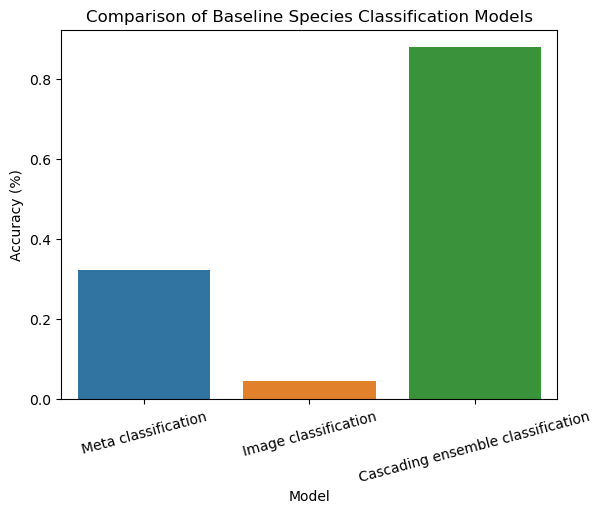

In [35]:
sns.barplot(data=global_df, x='model_purpose', y='accuracy')

plt.title('Comparison of Baseline Species Classification Models')
plt.xticks(rotation=15)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.show()

#### Accuracies down the taxonomic hierarchy

In [40]:
df_accuracy = accuracy_collection(df)

/home/travisdawson/anaconda3/envs/spatiotemp_class_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/travisdawson/anaconda3/envs/spatiotemp_class_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/travisdawson/anaconda3/envs/spatiotemp_class_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/travisdawson/anaconda3/envs/spatiotemp_class_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/travisdawson/anaconda3/envs/spatiotemp_class_env/lib/python3.1

In [41]:
df_accuracy['taxonomic_level'] = df_accuracy['taxonomic_level'].replace({'taxon_family_name': 'Family', 'taxon_genus_name': 'Genus', 'taxon_species_name': 'Species', 'sub_species': 'Subspecies'})

In [42]:
df_accuracy.head()

,taxonomic_level,accuracy,method
0,Family,0.992558,joint-classification
1,Family,0.985144,image-classification
2,Family,0.942897,meta-classification
3,Genus,0.509067,joint-classification
4,Genus,0.475899,image-classification


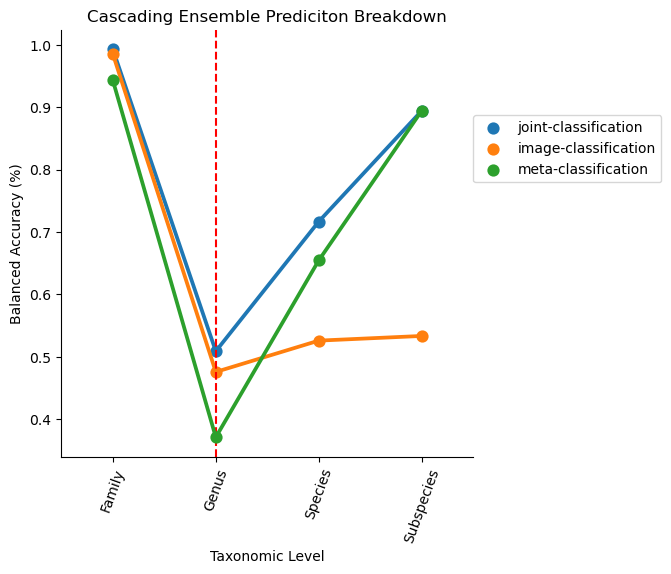

In [43]:
g = sns.catplot(data=df_accuracy, x='taxonomic_level', y='accuracy', hue='method', kind='point')
g.refline(x=1, color='red')
g._legend.remove()
g.set(xlabel=None)
g.set(ylabel=None)

plt.xticks(rotation=70)
plt.title('Cascading Ensemble Prediciton Breakdown')
plt.xlabel('Taxonomic Level')
plt.ylabel('Balanced Accuracy (%)')
plt.legend(bbox_to_anchor=(1.0, 0.8), loc='upper left', borderaxespad=0)
plt.show()

In [39]:
def accuracy_collection(df: pd.DataFrame):
    df_accuracy = pd.DataFrame()
    levels = ['taxon_family_name', 'taxon_genus_name', 'taxon_species_name', 'sub_species']
    for level in levels:
        df_level = df[df['taxonomic_level'] == level]  # Assign taxonomic level search
        
        joint_accuracy = balanced_accuracy_score(df_level['joint_prediction'], df_level['true_label'])  # Generate joint accuracy
        image_accuracy = balanced_accuracy_score(df_level['image_prediction'], df_level['true_label'])  # Generate image accuracy
        meta_accuracy = balanced_accuracy_score(df_level['meta_prediction'], df_level['true_label'])  # Generate meta accuracy
        
        row = pd.DataFrame([{'taxonomic_level': level, 'accuracy': joint_accuracy, 'method': 'joint-classification'},
                           {'taxonomic_level': level, 'accuracy': image_accuracy, 'method': 'image-classification'},
                           {'taxonomic_level': level, 'accuracy': meta_accuracy, 'method': 'meta-classification'}])  # Generate row dataframe
        df_accuracy = pd.concat([df_accuracy, row], ignore_index=True)  # Add new row to existing dataframe
    return df_accuracy

### Taxonomic Level Individual Perspective
Showcase the difference between the ensemble method predictions at each taxonomic level and the image classification level. 

In [68]:
differences = individual_difference(df).reset_index()

In [69]:
differences.head()

,index,precision,recall,f1-score,support,level
0,Elephantidae,0.005878,0.010152,0.008029,-6.0,Family
1,Felidae,0.008097,0.004676,0.006395,6.0,Family
2,Acinonyx,0.000000,0.000000,0.000000,0.0,Genus
3,Caracal,0.000000,0.057018,0.058900,-13.0,Genus
4,Catopuma,0.000000,0.000000,0.000000,3.0,Genus


#### Overall

In [76]:
differences_mean = differences.groupby('level').agg({'precision': 'mean', 'recall': 'mean', 'f1-score': 'mean'})

In [77]:
differences_mean.head()

,precision,recall,f1-score
level,,,
Family,0.006988,0.007414,0.007212
Genus,0.031351,0.031095,0.037923
Species,0.158010,0.181611,0.189856
Subspecies,0.284447,0.342424,0.342758


In [78]:
differences_mean = differences_mean.reindex(['Family', 'Genus', 'Species', 'Subspecies'])

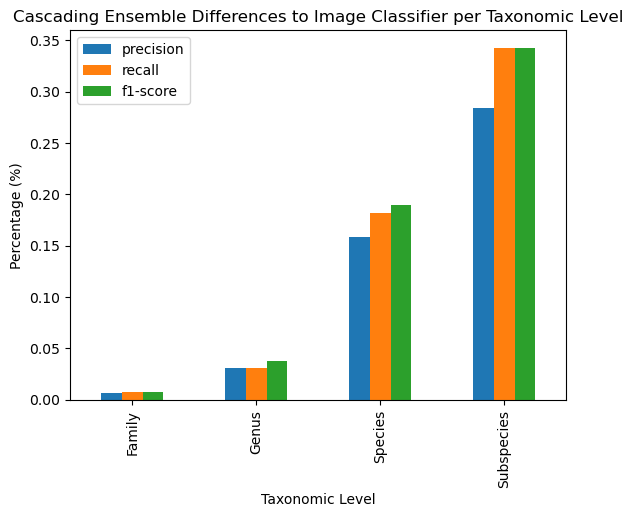

In [87]:
differences_mean.plot(kind='bar')

plt.title('Cascading Ensemble Differences to Image Classifier per Taxonomic Level')
plt.ylabel('Percentage (%)')
plt.xlabel('Taxonomic Level')
plt.show()

#### Family

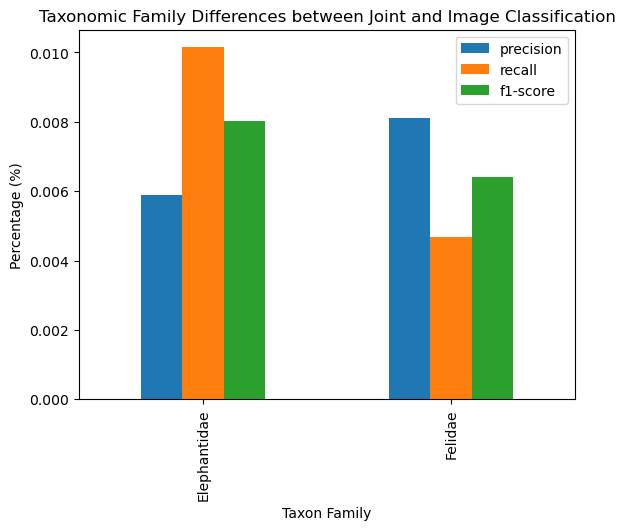

In [80]:
family_diff = differences[differences['level'] == 'Family']

family_diff.plot(kind='bar',
                x='index',
                y=['precision', 'recall', 'f1-score'])

plt.title('Taxonomic Family Differences between Joint and Image Classification')
plt.xlabel('Taxon Family')
plt.ylabel('Percentage (%)')
plt.show()

#### Genus

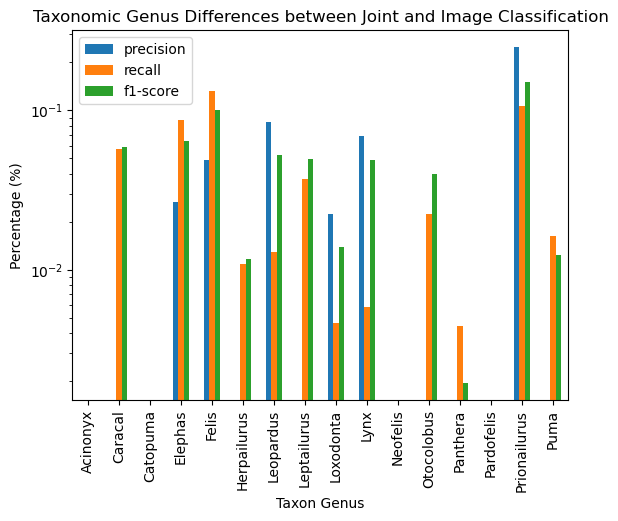

In [81]:
genus_diff = differences[differences['level'] == 'Genus']

genus_diff.plot(kind='bar',
                x='index',
                y=['precision', 'recall', 'f1-score'])

plt.title('Taxonomic Genus Differences between Joint and Image Classification')
plt.xlabel('Taxon Genus')
plt.ylabel('Percentage (%)')
plt.yscale('log')
plt.show()

#### Species

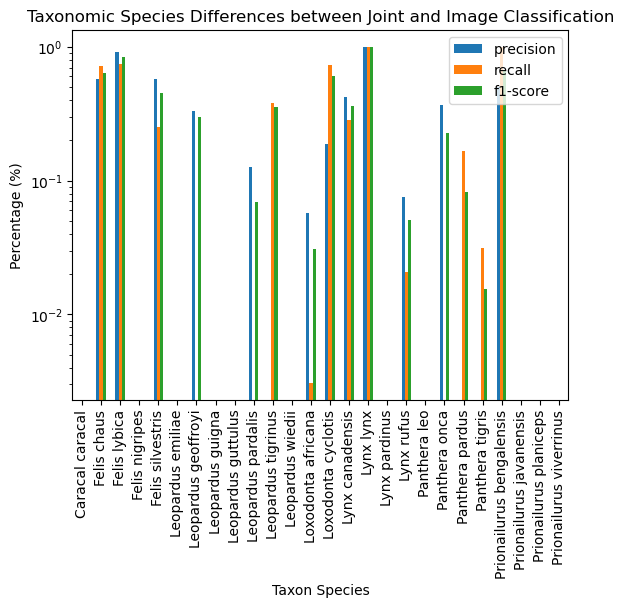

In [82]:
species_diff = differences[differences['level'] == 'Species']

species_diff.plot(kind='bar',
                x='index',
                y=['precision', 'recall', 'f1-score'])

plt.yscale('log')
plt.title('Taxonomic Species Differences between Joint and Image Classification')
plt.xlabel('Taxon Species')
plt.ylabel('Percentage (%)')
plt.show()

#### Sub-species

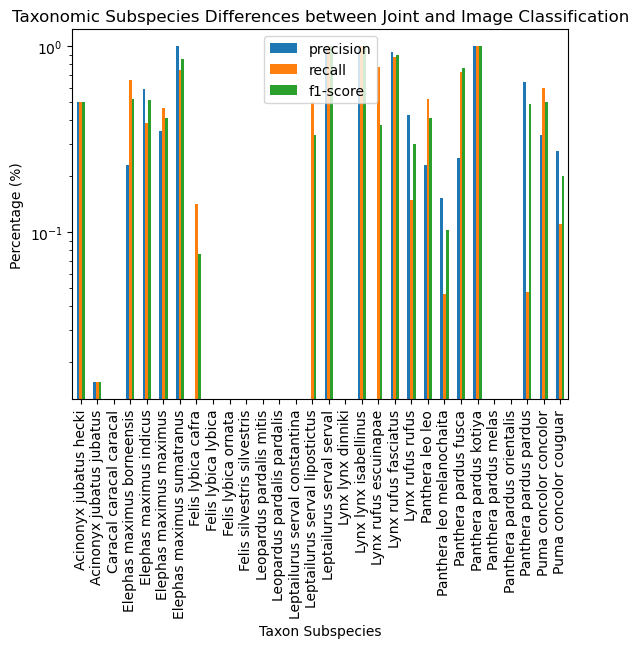

In [83]:
subspecies_diff = differences[differences['level'] == 'Subspecies']

subspecies_diff.plot(kind='bar',
                x='index',
                y=['precision', 'recall', 'f1-score'])

plt.yscale('log')
plt.title('Taxonomic Subspecies Differences between Joint and Image Classification')
plt.xlabel('Taxon Subspecies')
plt.ylabel('Percentage (%)')
plt.show()

In [67]:
convert_dict = {'taxon_family_name': 'Family', 'taxon_genus_name': 'Genus', 'taxon_species_name': 'Species', 'sub_species': 'Subspecies'}

def individual_difference(df: pd.DataFrame):
    df_individual = pd.DataFrame()
    levels = ['taxon_family_name', 'taxon_genus_name', 'taxon_species_name', 'sub_species']
    for level in levels:
        df_level = df[df['taxonomic_level'] == level]  # Assign taxonomic level search
        
        joint_accuracy = classification_report(df_level['joint_prediction'], df_level['true_label'], output_dict=True, zero_division=0)  # Generate joint accuracy
        image_accuracy = classification_report(df_level['image_prediction'], df_level['true_label'], output_dict=True, zero_division=0)  # Generate image accuracy
    
        df_joint = pd.DataFrame(joint_accuracy).T
        df_image = pd.DataFrame(image_accuracy).T
        
        
        df_joint = df_joint[df_joint['support'] != 0]  # Remove classes with no observations in test set
        df_image = df_image[df_image['support'] != 0]
        
        
        df_joint.drop(df_joint.tail(3).index, inplace = True)
        df_image.drop(df_image.tail(3).index, inplace = True)
        
        difference = df_joint.subtract(df_image, axis=0, fill_value=0)
        difference['level'] = convert_dict[level]
        df_individual = pd.concat([df_individual, difference])
    return df_individual
        
        